<a href="https://colab.research.google.com/github/cactusvibeyjy/colab/blob/main/flower_photos_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
gen = ImageDataGenerator(rotation_range = 15,
                         width_shift_range = 0.3,
                         shear_range=0.1,
                         rescale=1./255)


In [6]:
data_path = '/content/gdrive/My Drive/flower_photos'
batch_siz = 3670

In [7]:
data_gen = gen.flow_from_directory(directory=data_path,
                                   batch_size=batch_siz,
                                   shuffle=True,
                                   target_size=(100, 100),
                                   class_mode='categorical')

Found 2313 images belonging to 5 classes.


In [8]:
img, label = data_gen.next()
print(len(img))


2313


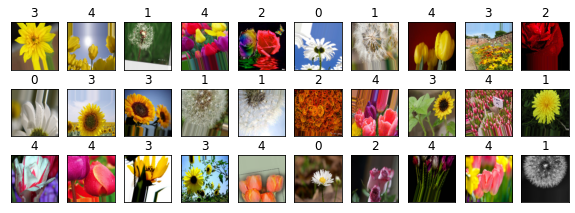

In [9]:
plt.figure(figsize=(10,12))
for i in range(30):
    plt.subplot(10,10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(str(np.argmax(label[i])))
    plt.imshow(img[i])

In [10]:
import numpy as np

result = []
for i in range(2313):
  result.append(np.argmax(label[i]))
result = np.array(result).reshape(-1, 1)
result.shape

(2313, 1)

In [11]:
#train_data, test_data split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(img, result,test_size=0.3,
shuffle=False, random_state=1004)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


x_train shape: (1619, 100, 100, 3)
x_test shape: (694, 100, 100, 3)
y_train shape: (1619, 1)
y_test shape: (694, 1)


In [12]:
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),input_shape=(100,100,3), padding='same', activation='relu'))
cnn.add(Conv2D(32,(3,3),input_shape=(100,100,3), padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64,(3,3), padding='same', activation='relu'))
cnn.add(Conv2D(64,(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128,(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(256,(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 64)        36928     
                                                        

In [13]:
from datetime import datetime
start_time = datetime.now()
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

early_stopping=EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint=ModelCheckpoint(filepath="/data/bast.h5", monitor='val_loss', save_base_only=True, verbose=1)

hist=cnn.fit(x_train, y_train, batch_size=256, epochs=250, validation_data=(x_test, y_test), callbacks=[early_stopping, model_checkpoint])

end_time=datetime.now()

Epoch 1/250
7/7 [==============================] - ETA: 0s - loss: 1.9533 - accuracy: 0.2044
Epoch 1: saving model to /data/bast.h5
7/7 [==============================] - 15s 572ms/step - loss: 1.9533 - accuracy: 0.2044 - val_loss: 1.9076 - val_accuracy: 0.2795
Epoch 2/250
7/7 [==============================] - ETA: 0s - loss: 1.7243 - accuracy: 0.2310
Epoch 2: saving model to /data/bast.h5
7/7 [==============================] - 2s 221ms/step - loss: 1.7243 - accuracy: 0.2310 - val_loss: 1.6348 - val_accuracy: 0.3487
Epoch 3/250
7/7 [==============================] - ETA: 0s - loss: 1.5368 - accuracy: 0.3440
Epoch 3: saving model to /data/bast.h5
7/7 [==============================] - 2s 222ms/step - loss: 1.5368 - accuracy: 0.3440 - val_loss: 1.4117 - val_accuracy: 0.4323
Epoch 4/250
7/7 [==============================] - ETA: 0s - loss: 1.3912 - accuracy: 0.4361
Epoch 4: saving model to /data/bast.h5
7/7 [==============================] - 2s 223ms/step - loss: 1.3912 - accuracy: 0.43

In [14]:
cnn.evaluate(x_test, y_test)

22/22 [==============================] - 1s 19ms/step - loss: 0.6940 - accuracy: 0.7507


[0.6939970850944519, 0.7507204413414001]

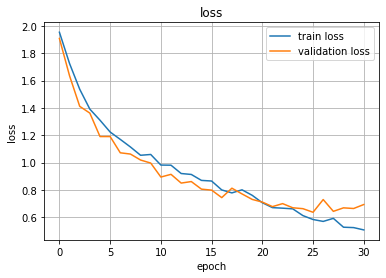

In [15]:
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')
plt.grid()
plt.show()

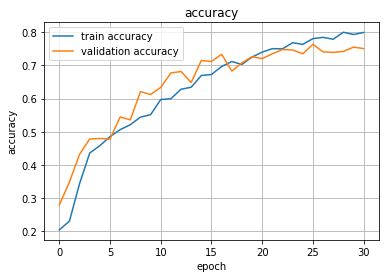

In [16]:
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(hist.history['accuracy'],label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [18]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)

In [19]:
map = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

22/22 [==============================] - 0s 15ms/step


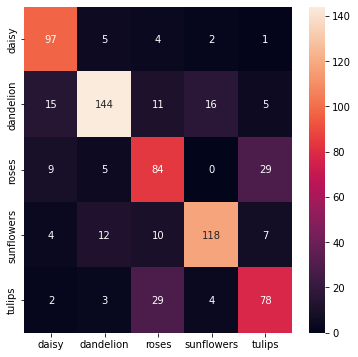

In [20]:
plt.figure(figsize=(6, 6))
predicted_value = cnn.predict(x_test)
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(predicted_value, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=map, yticklabels=map)
plt.show()

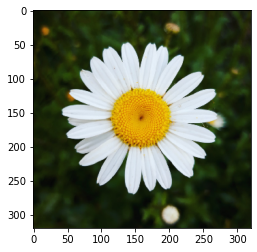

In [31]:
from tensorflow.keras.preprocessing import image
img_path = '/content/gdrive/MyDrive/test_flowers/daisy2.jpg'
img = image.load_img(img_path, target_size=(320, 320))
plt.imshow(img)
plt.show()

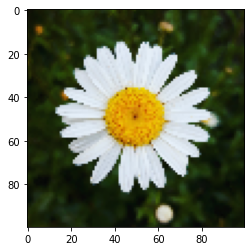

In [33]:
img_path = '/content/gdrive/MyDrive/test_flowers/daisy2.jpg'
img = image.load_img(img_path, target_size=(100, 100))
plt.imshow(img)
plt.show()

In [34]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

print(f"Image is {map[np.argmax(cnn.predict(img_batch))]}")

1/1 [==============================] - 0s 158ms/step
Image is daisy


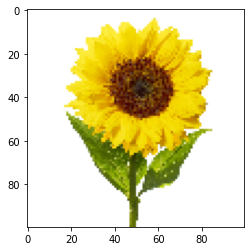

In [35]:
img_path = '/content/gdrive/MyDrive/test_flowers/sunflower01.jpg'
img = image.load_img(img_path, target_size=(100, 100))
plt.imshow(img)
plt.show()

In [36]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

print(f"Image is {map[np.argmax(cnn.predict(img_batch))]}")


1/1 [==============================] - 0s 19ms/step
Image is sunflowers


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


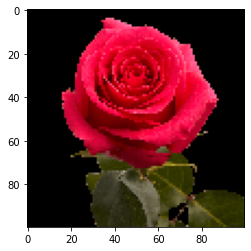

In [37]:
img_path = '/content/gdrive/MyDrive/test_flowers/rose1.jpg'
img = image.load_img(img_path, target_size=(100, 100))
plt.imshow(img)
plt.show()

In [38]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

print(f"Image is {map[np.argmax(cnn.predict(img_batch))]}")

1/1 [==============================] - 0s 19ms/step
Image is roses


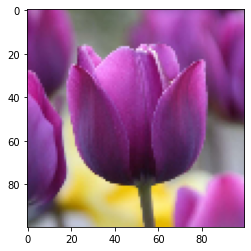

In [39]:
img_path = '/content/gdrive/MyDrive/test_flowers/tulip01.jpg'
img = image.load_img(img_path, target_size=(100, 100))
plt.imshow(img)
plt.show()

In [40]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

print(f"Image is {map[np.argmax(cnn.predict(img_batch))]}")

1/1 [==============================] - 0s 39ms/step
Image is tulips
